In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
tf.__version__

'2.5.0'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('archive/images/images/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 28821 images belonging to 7 classes.


In [6]:
test_set = test_datagen.flow_from_directory('archive/images/images/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7066 images belonging to 7 classes.


In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=7, activation='softmax'))

In [15]:
optimizer=Adam(learning_rate=0.0001)

In [16]:
cnn.compile(optimizer =optimizer , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
cnn.fit(training_set,validation_data=test_set,epochs=35)

Epoch 1/35
901/901 [==============================] - 576s 637ms/step - loss: 1.7797 - accuracy: 0.2734 - val_loss: 1.6731 - val_accuracy: 0.3477
Epoch 2/35
901/901 [==============================] - 84s 94ms/step - loss: 1.6408 - accuracy: 0.3628 - val_loss: 1.5758 - val_accuracy: 0.4018
Epoch 3/35
901/901 [==============================] - 90s 100ms/step - loss: 1.5868 - accuracy: 0.3863 - val_loss: 1.5291 - val_accuracy: 0.4125
Epoch 4/35
901/901 [==============================] - 87s 97ms/step - loss: 1.5430 - accuracy: 0.4070 - val_loss: 1.4891 - val_accuracy: 0.4342
Epoch 5/35
901/901 [==============================] - 87s 97ms/step - loss: 1.5035 - accuracy: 0.4225 - val_loss: 1.4643 - val_accuracy: 0.4353
Epoch 6/35
901/901 [==============================] - 84s 93ms/step - loss: 1.4708 - accuracy: 0.4337 - val_loss: 1.4353 - val_accuracy: 0.4492
Epoch 7/35
901/901 [==============================] - 83s 92ms/step - loss: 1.4440 - accuracy: 0.4455 - val_loss: 1.3995 - val_accura

Predicted Emotion:  Sad


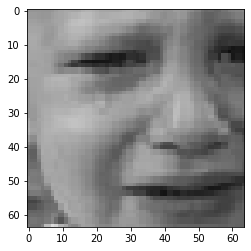

In [41]:
predictEmotion("archive/images/images/validation/sad/580.jpg")

In [42]:
cnn.save('trainedmodel.h5')

In [17]:
conv=tf.keras.models.load_model('trainedmodel.h5')

In [18]:
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
class_names = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
def predictEmotion(filepath):
    
    img1 = image.load_img(filepath, target_size = (64,64))
    
    plt.imshow(img1)
    
    Y = image.img_to_array(img1, dtype=int)
    X = np.expand_dims(Y, axis=0)
    
    result = conv.predict(X)
    index = np.argmax(result)
    
    #print(index)
    
    print("Predicted Emotion: ", class_names[index])

Predicted Emotion:  Surprise


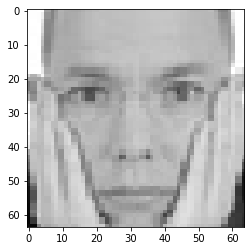

In [20]:
predictEmotion("archive/images/images/validation/sad/1156.jpg")